# **"Exploring the Impact of Age on Gaming Engagement: A Regression Analysis of Minecraft Session Lengths"**

## **Introduction**

The project presented in this report examines how people play video games, focusing specifically on Minecraft. The data for our analysis was provided by the computer science department at UBC, which set up a Minecraft server to study player behaviors and patterns. The server tracks each player's activity as they navigate through the game world, aiming to uncover habits and trends in how people interact with the game.

The primary objective of this initiative is to better understand the player base, identify target demographics for recruitment, and ensure the server can accommodate sufficient licenses to handle the number of participants. To streamline their recruitment process and optimize resources, the project team, led by Frank Wood, is exploring several questions about the collected data.

Our group’s contribution to this effort is focused on answering the question: **How does age predict the session length of a player?** This inquiry is critical for understanding how age influences player engagement and can help refine strategies for server management and recruitment. To address this question, we utilized two datasets: the **“sessions”** dataset, which logs player activity in the game, and the **“players”** dataset, which provides demographic and attribute information about the players.


# **Methods and Results** 


#### We start by loading the software from the library 

In [2]:
library(tidyverse)
library(repr)
library(readxl) 
library(lubridate) 
library(ggplot2) 
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Now we will download the `sessions.csv` and `players.csv` files 

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz" 
players_df <- read_csv(url) 

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB" 
sessions_df <- read_csv(url) 


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## **Data Description:**

### Players Dataset Summary

#### Overview
- **Observations**: 196
- **Variables**: 9
- **Tidy**: Yes, with each row as a unique player and each column as an attribute

#### Variable Summary

| Variable           | Type       | Description                                                   | Missing |
|--------------------|------------|---------------------------------------------------------------|---------|
| `experience`       | Character | Player experience level (e.g., Pro, Veteran, Amateur)        | None    |
| `subscribe`        | Logical     | Subscription status (TRUE/FALSE)                              | None    |
| `hashedEmail`      | Character | Hashed email as identifier                                    | None    |
| `played_hours`     | Numeric     | Total gameplay hours                                         | None    |
| `name`             | Character | Player’s first name                                           | None    |
| `gender`           | Character | Gender ("Male", "Female", "Other", "Prefer not to say")      | None    |
| `age`              | Numeric     | Age of player                                                 | Some    |
| `individualId`     | Logical     | Individual player ID (all missing)                           | All     |
| `organizationName` | Logical     | Organization name (all missing)                              | All     |

#### Key Observations
- **Experience and Playtime**: `experience` may correlate with `played_hours`.
- **Subscription Analysis**: Subscription status could influence playtime or engagement.
- **Demographics**: Includes `name`, `gender`, `age`; age has some missing values, which may affect demographic analysis.
- **Missing Data**: `individualId` and `organizationName` are entirely missing, likely irrelevant or uncollected.
- **Potential Privacy Concerns**: `name` and `hashedEmail` could be sensitive.

#### Notes
- **Data Completeness**: Missing values in `age`; `individualId` and `organizationName` are completely `NA`.
- **Collection Uncertainty**: Unknown collection method; potential self-reporting biases for demographics.


### Sessions Dataset Summary

#### Overview
- **Observations**: 1,535
- **Variables**: 5
- **Tidy**: Each row represents a unique session, with columns for attributes

#### Variable Summary

| Variable             | Type       | Description                                                   | Missing |
|----------------------|------------|---------------------------------------------------------------|---------|
| `hashedEmail`        | Character | Hashed email identifier for each user                         | None    |
| `start_time`         | Character   | Start time of the session (formatted as `dd/mm/yyyy hh:mm`)  | None    |
| `end_time`           | Character   | End time of the session (formatted as `dd/mm/yyyy hh:mm`)    | None    |
| `original_start_time`| Numeric     | Original start time recorded as a timestamp                   | None    |
| `original_end_time`  | Numeric     | Original end time recorded as a timestamp                     | None    |

#### Key Observations
- **Duplicate Sessions**: Some rows have identical values, indicating possible duplicate sessions that need to be addressed.
- **Time Format Variance**: Date-time values are recorded in both character and numeric formats, potentially causing consistency issues.
- **Timezone Absence**: No timezone information is included, which could be problematic if sessions were conducted across different time zones.

#### Notes
- **Data Completeness**: No missing values are apparent in this sample.
- **Potential Privacy Consideration**: `hashedEmail` ensures user anonymity but allows for session tracking.
- **Collection Uncertainty**: Exact method of data collection is unknown; might involve automated tracking of user sessions on a digital platform.



## **Data Wrangling** 

This section outlines the steps taken to prepare the data for analysis, including merging datasets, calculating session length, and filtering outliers.

---

## Steps:

### 1. Merging Datasets
We merged the `players.csv` and `sessions.csv` datasets using the `hashedEmail` column as the key. This allowed us to associate session data (e.g., session times) with player attributes (e.g., age, experience). Combining these datasets enabled us to analyze how player demographics, specifically age, influence session length.

In [32]:
merged_data <- merge(players_df, sessions_df, by = "hashedEmail")

### 2. Calculating Session Length
To measure player engagement, we calculated the session length by subtracting `start_time` from `end_time`. This gave us the duration of each session in minutes, which is the dependent variable in our analysis. 

In [33]:
merged_data$start_time <- as.POSIXct(merged_data$start_time, format = "%d/%m/%Y %H:%M")
merged_data$end_time <- as.POSIXct(merged_data$end_time, format = "%d/%m/%Y %H:%M")

# Calculate session length in minutes
merged_data$session_length <- as.numeric(difftime(merged_data$end_time, merged_data$start_time, units = "mins"))

### 3. Handling Missing Values
Rows with missing or invalid session lengths were removed to ensure the data used in the analysis was complete and accurate. Missing values in session length could indicate incomplete logs, and including them would compromise the validity of our results

In [34]:
merged_data <- merged_data[!is.na(merged_data$session_length), ]

### 4. Filtering Outliers
We removed extreme outliers from the `session_length` and `age` variables:
- **Session Length**: Outliers were identified using the 1.5 IQR rule to exclude sessions that were unusually short or excessively long, which might skew results.
- **Age**: Values outside a plausible range (e.g., below 8 or above 99 years) were filtered, as they are unlikely to represent realistic data for Minecraft players.

In [39]:
Q1 <- quantile(merged_data$session_length, 0.25)
Q3 <- quantile(merged_data$session_length, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

filtered_data <- merged_data[merged_data$session_length >= lower_bound & merged_data$session_length <= upper_bound, ]

In [40]:
filtered_data <- filtered_data[filtered_data$age >= 8 & filtered_data$age <= 99, ]

### 5. Selecting Relevant Variables
To focus our analysis, we retained only the variables essential to our research question:
- `age`: The independent variable used to predict session length.
- `session_length`: The dependent variable representing player engagement.
- `played_hours`: Total hours a player has engaged with the game, offering additional context for session behavior.
- `experience` and `subscribe`: Categorical variables providing further insights into player demographics and preferences.


In [16]:
filtered_data <- filtered_data |>
select(hashedEmail, age, session_length, played_hours, experience, subscribe)

# Summary statistics for key variables
summary(filtered_data[c("session_length", "age", "played_hours")])

 session_length       age         played_hours   
 Min.   :  3.0   Min.   : 8.00   Min.   :  0.00  
 1st Qu.:  9.0   1st Qu.:17.00   1st Qu.: 32.00  
 Median : 26.5   Median :17.00   Median : 56.10  
 Mean   : 42.0   Mean   :19.45   Mean   : 94.64  
 3rd Qu.: 65.0   3rd Qu.:23.00   3rd Qu.:178.20  
 Max.   :168.0   Max.   :99.00   Max.   :223.10  

In [17]:
head(filtered_data)

,hashedEmail,age,session_length,played_hours,experience,subscribe
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,20,45,1.5,Regular,TRUE
2,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,20,61,1.5,Regular,TRUE
3,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,21,30,0.4,Pro,FALSE
4,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,17,11,0.1,Beginner,TRUE
5,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,17,24,5.6,Regular,TRUE
6,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,17,34,5.6,Regular,TRUE


#### What Does `filtered_data` Represent?
The `filtered_data` dataset is a cleaned and streamlined version of the raw data, containing only the relevant and reliable information needed for analysis. It includes:
- **Player Information**:
  - `age`: The age of the player.
  - `experience`: The skill level or experience of the player.
  - `subscribe`: Whether the player has an active subscription (TRUE/FALSE).
- **Session Information**:
  - `session_length`: The duration of each session in minutes, calculated as the difference between `start_time` and `end_time`.
  - `played_hours`: The total cumulative playtime for each player.

#### Importance of `filtered_data`
This dataset is now ready for exploratory data analysis and modeling. By removing irrelevant variables, addressing missing values, and excluding outliers, `filtered_data` ensures that the analysis focuses solely on meaningful and accurate relationships. Specifically, it allows us to investigate the relationship between age and session length without interference from noise or errors in the data.




## Exploratory Data Analysis

This section covers the EDA steps for understanding the relationship between `age` and `session_length`.

---



### Summary Statistics



In [54]:
summary(filtered_data[c("age", "session_length")])

      age        session_length 
 Min.   : 8.00   Min.   :  3.0  
 1st Qu.:17.00   1st Qu.:  9.0  
 Median :17.00   Median : 26.5  
 Mean   :19.45   Mean   : 42.0  
 3rd Qu.:23.00   3rd Qu.: 65.0  
 Max.   :99.00   Max.   :168.0  

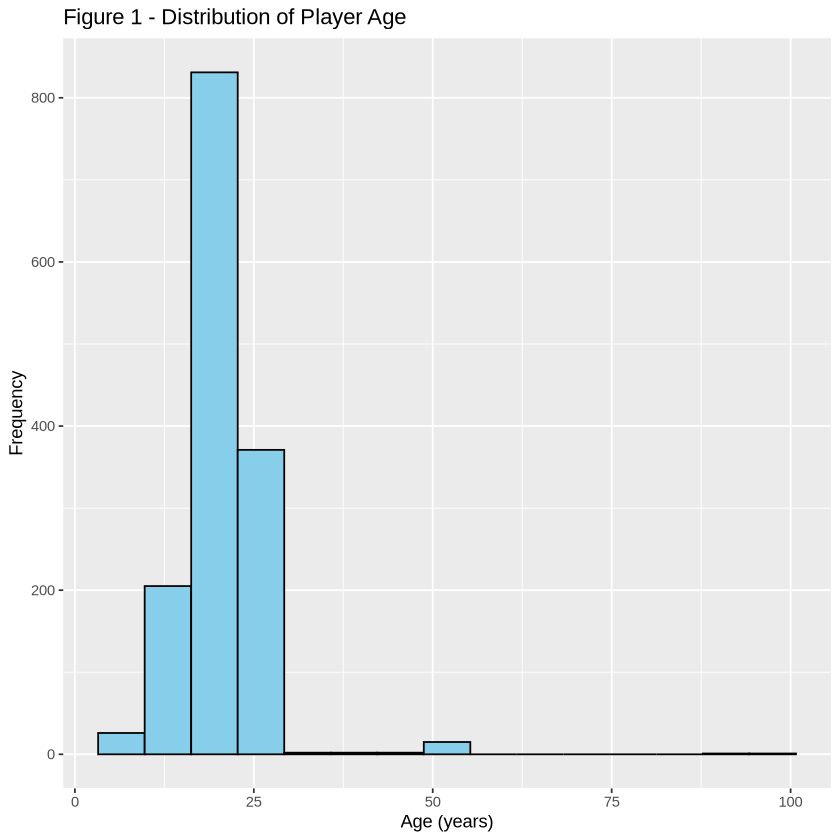

In [41]:
ggplot(filtered_data, aes(x = age)) +
  geom_histogram(bins = 15, fill = "skyblue", color = "black") +
  labs(title = "Figure 1 - Distribution of Player Age", x = "Age (years)", y = "Frequency")

The histogram of player age indicates:

- **Concentration of Younger Players**: The majority of players are between **15 and 25 years old**.
- **Peak Age**: There is a noticeable peak around **17 years**, suggesting this is the most common age among players.
- **Fewer Older Players**: There is a decline in the number of players beyond 30 years, with very few players up to 99 years old.

*This distribution suggests that a younger demographic predominantly plays Minecraft.*


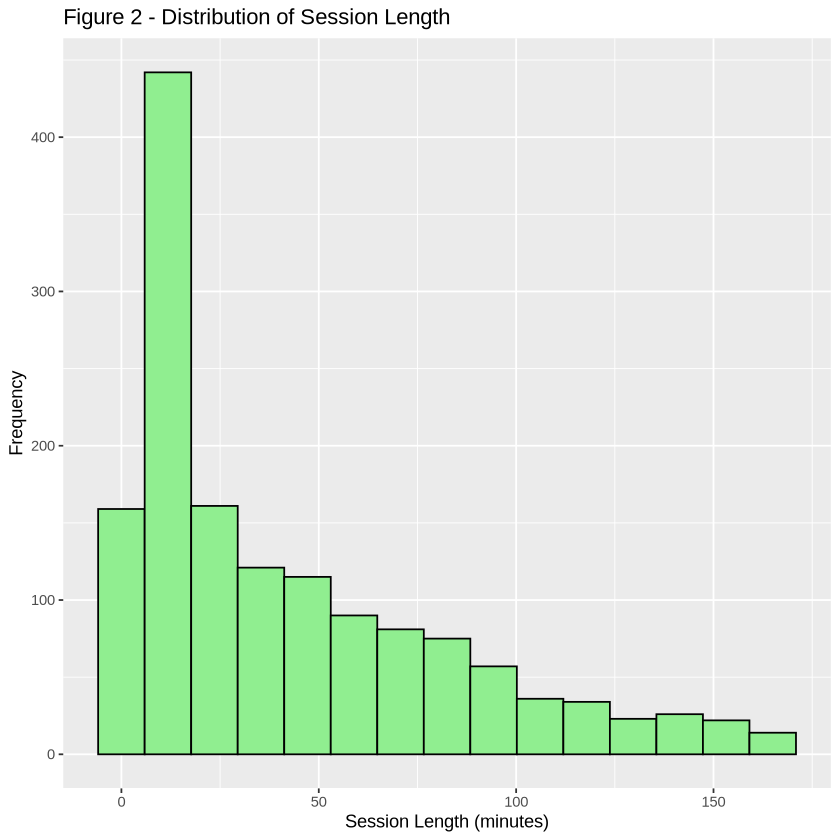

In [42]:
ggplot(filtered_data, aes(x = session_length)) +
  geom_histogram(bins = 15, fill = "lightgreen", color = "black") +
  labs(title = "Figure 2 - Distribution of Session Length", x = "Session Length (minutes)", y = "Frequency")

The histogram of session lengths shows:

- **Right-Skewed Distribution**: Most sessions are shorter, with lengths under **70 minutes**.
- **Common Session Duration**: A high frequency of sessions lasts between **10 and 30 minutes**.
- **Longer Sessions Are Rare**: While sessions can extend up to **168 minutes**, these are less common.

*This implies that players typically engage in relatively short gaming sessions.*


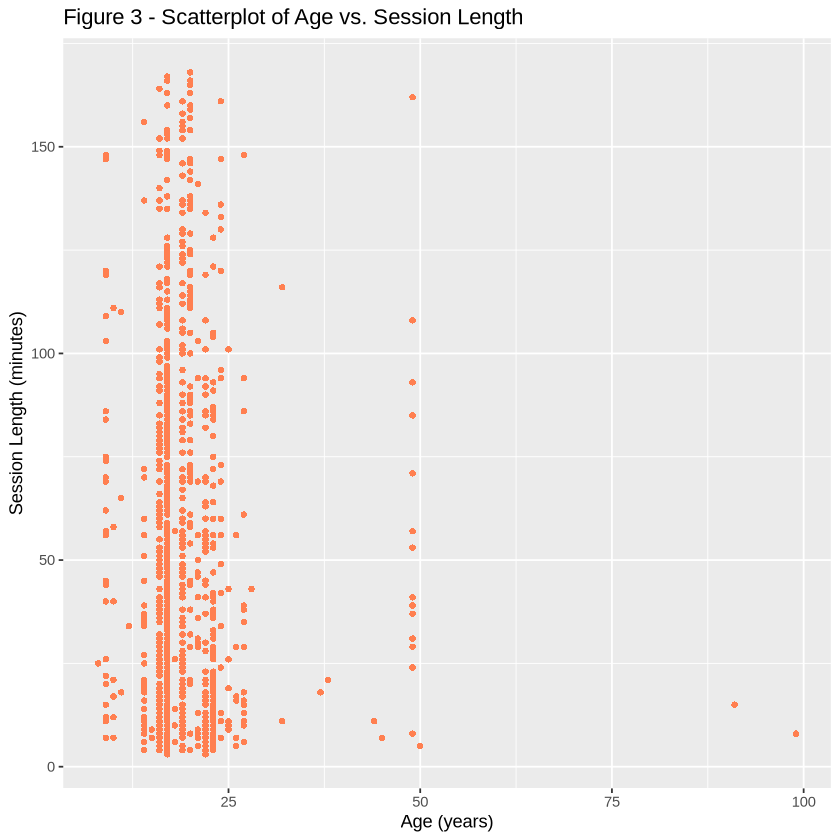

In [43]:
ggplot(filtered_data, aes(x = age, y = session_length)) +
  geom_point(color = "coral", shape = 16) +
  labs(title = "Figure 3 - Scatterplot of Age vs. Session Length", x = "Age (years)", y = "Session Length (minutes)")

The scatterplot reveals:

- **Weak Relationship**: There is a wide scatter of data points with no clear linear pattern.
- **Variability Across Ages**: Players of all ages exhibit a wide range of session lengths.
- **No Strong Predictive Trend**: Age does not appear to strongly predict session length based on the scatterplot alone.

*This suggests that age may not be a significant predictor of how long a player engages in a session, warranting further analysis through regression.*


---

## Insights

- **Overall Observation**: The preliminary analysis indicates a weak correlation between age and session length.
- **Potential Factors**: Other variables, such as player experience or subscription status, might influence session length more significantly.
- **Next Steps**: Proceed to regression analysis to quantitatively assess the relationship between age and session length.

These findings provide a foundational understanding of the data and guide the subsequent steps in our analysis.

# Regression Analysis

## Step 1: Data Splitting

We split the cleaned dataset into **training** and **testing** sets to build and evaluate the regression model:
- **Training Data**: 75% of the data, used to fit the model.
- **Testing Data**: 25% of the data, used to evaluate model performance.


In [27]:
set.seed(7)
data_split <- initial_split(filtered_data, prop = 0.75, strata = session_length)
train_data <- training(data_split)
test_data <- testing(data_split)

## Step 2: Model Specification and Fitting
We defined a linear regression model to predict `session_length` based on `age`. A recipe specifying the formula was created, and the model was fit using the **training data**.

In [28]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(session_length ~ age, data = train_data)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = train_data)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
    58.6582      -0.8521  


## Step 3: Model Evaluation
The fitted model was used to predict `session_length` on the testing data. We evaluated the model’s performance using metrics such as **Root Mean Square Percentage Error (RMSPE) and R-squared**.

In [29]:
lm_test_results <- lm_fit |>
  predict(test_data) |>
  bind_cols(test_data) |>
  metrics(truth = session_length, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,39.70454398
rsq,standard,0.01116709
mae,standard,32.58628112


## Step 4: Visualization
We plotted a scatterplot of `age` vs. `session_length` and overlayed the regression line using predictions from the model. This visualization helps to interpret the relationship between `age` and `session_length`.



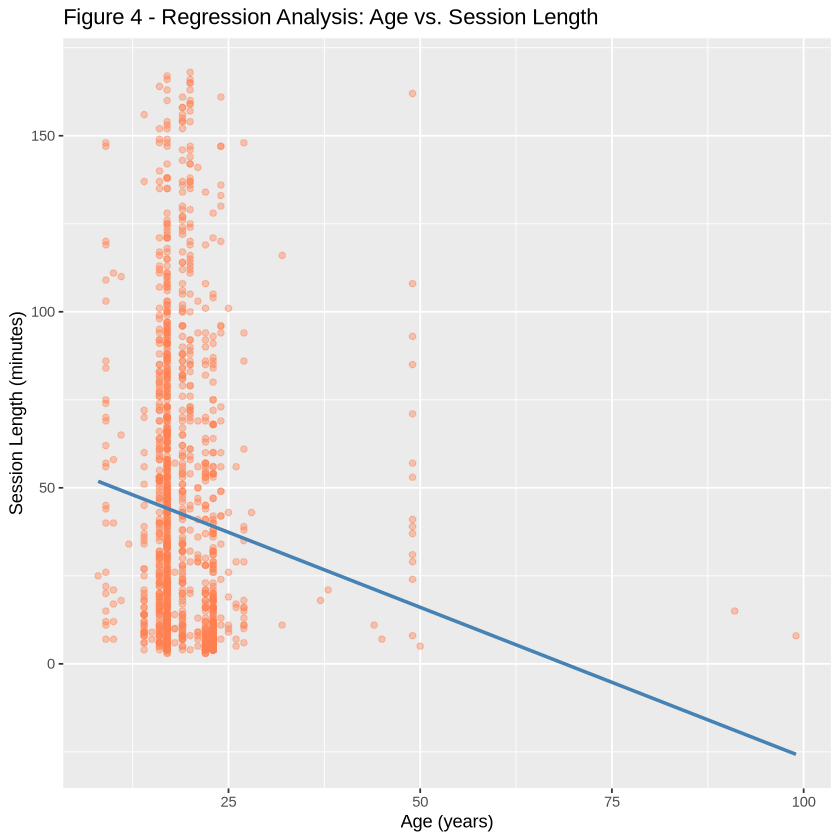

In [45]:
age_prediction_grid <- tibble(
  age = seq(min(filtered_data$age), max(filtered_data$age), length.out = 100))

regression_preds <- lm_fit |>
  predict(age_prediction_grid) |>
  bind_cols(age_prediction_grid)

lm_plot_final <- ggplot(filtered_data, aes(x = age, y = session_length)) +
  geom_point(alpha = 0.4, color = "coral") +
  geom_line(data = regression_preds,
            mapping = aes(x = age, y = .pred),
            color = "steelblue", linewidth = 1) +
  labs(title = "Figure 4 - Regression Analysis: Age vs. Session Length", x = "Age (years)", y = "Session Length (minutes)")

lm_plot_final

## Discussion

### Summary of Findings
Our analysis revealed a negative correlation between age and session length, as visualized in the regression plot. This suggests that younger players tend to spend more time per session compared to older players. The regression line highlights this trend, though the spread of data points indicates variability.

### Alignment with Expectations
The findings align with expectations, as younger players often have more free time or interest in prolonged gaming sessions. However, the variability suggests other factors, such as individual preferences or external circumstances, also influence session length.

### Potential Impact of Findings
These insights could impact game development and player engagement strategies:
- **Targeted Design**: Developers could create age-specific content or incentives to maximize engagement.
- **Marketing Strategies**: Advertisements and promotions can be tailored to appeal to younger audiences, who are likely to engage in longer gaming sessions.
- **Parental Control Features**: Game publishers could use these findings to introduce features that manage session length for younger audiences.

### Future Questions
The study raises several questions for future exploration:
1. What external factors (e.g., time of day, device used) further influence session length?
2. Does the type of gameplay (e.g., creative mode vs. survival mode) affect session length differently across age groups?
3. How do social factors, such as playing with friends, impact the session length for players of different ages?
4. Can predictive models incorporating additional variables provide a more comprehensive understanding of session length?

Further studies with a larger dataset and additional variables could provide deeper insights into player behavior.